## Goal:
### Explore the honey production dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.

### 1. Why This Project?
 
#### 1.Learn data cleaning with Pandas.
 
#### 2.Use NumPy for calculations (mean, median, etc.).
 
#### 3.Visualize trends using Matplotlib and Seaborn.
 
#### 4.Understand the relationship between features.

# 2. Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# 3. Load the dataset

In [3]:
df = pd.read_csv(r'C:\Users\PanasaKamal\Data Analysis\Week_5_Assignment\csv_files\honeyproduction.csv')
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [5]:
avg_yield = np.mean(df['yieldpercol'])
print("Overall Average Honey Yield (lbs/colony):", avg_yield)

total_value_by_state = df.groupby('state')['prodvalue'].sum()
print("\nTotal Production Value by State:\n", total_value_by_state)

avg_yield_by_year = df.groupby('year')['yieldpercol'].mean()
print("\nAverage Yield per Colony by Year:\n", avg_yield_by_year)

Overall Average Honey Yield (lbs/colony): 62.00958466453674

Total Production Value by State:
 state
AL     15029000.0
AR     40266000.0
AZ     31677000.0
CA    365390000.0
CO     31354000.0
FL    249229000.0
GA     58013000.0
HI     21063000.0
IA     38825000.0
ID     71431000.0
IL     15113000.0
IN     10358000.0
KS     13861000.0
KY      7199000.0
LA     54303000.0
MD      1833000.0
ME      5067000.0
MI     86804000.0
MN    157850000.0
MO     14768000.0
MS     24252000.0
MT    176903000.0
NC     17158000.0
ND    545642000.0
NE     52895000.0
NJ      9105000.0
NM      8208000.0
NV     10669000.0
NY     75063000.0
OH     23282000.0
OK      1711000.0
OR     39349000.0
PA     27745000.0
SC      1338000.0
SD    290651000.0
TN     11399000.0
TX    111438000.0
UT     20165000.0
VA      8583000.0
VT      8435000.0
WA     49787000.0
WI     97706000.0
WV      8289000.0
WY     42848000.0
Name: prodvalue, dtype: float64

Average Yield per Colony by Year:
 year
1998    69.953488
1999    65.46511

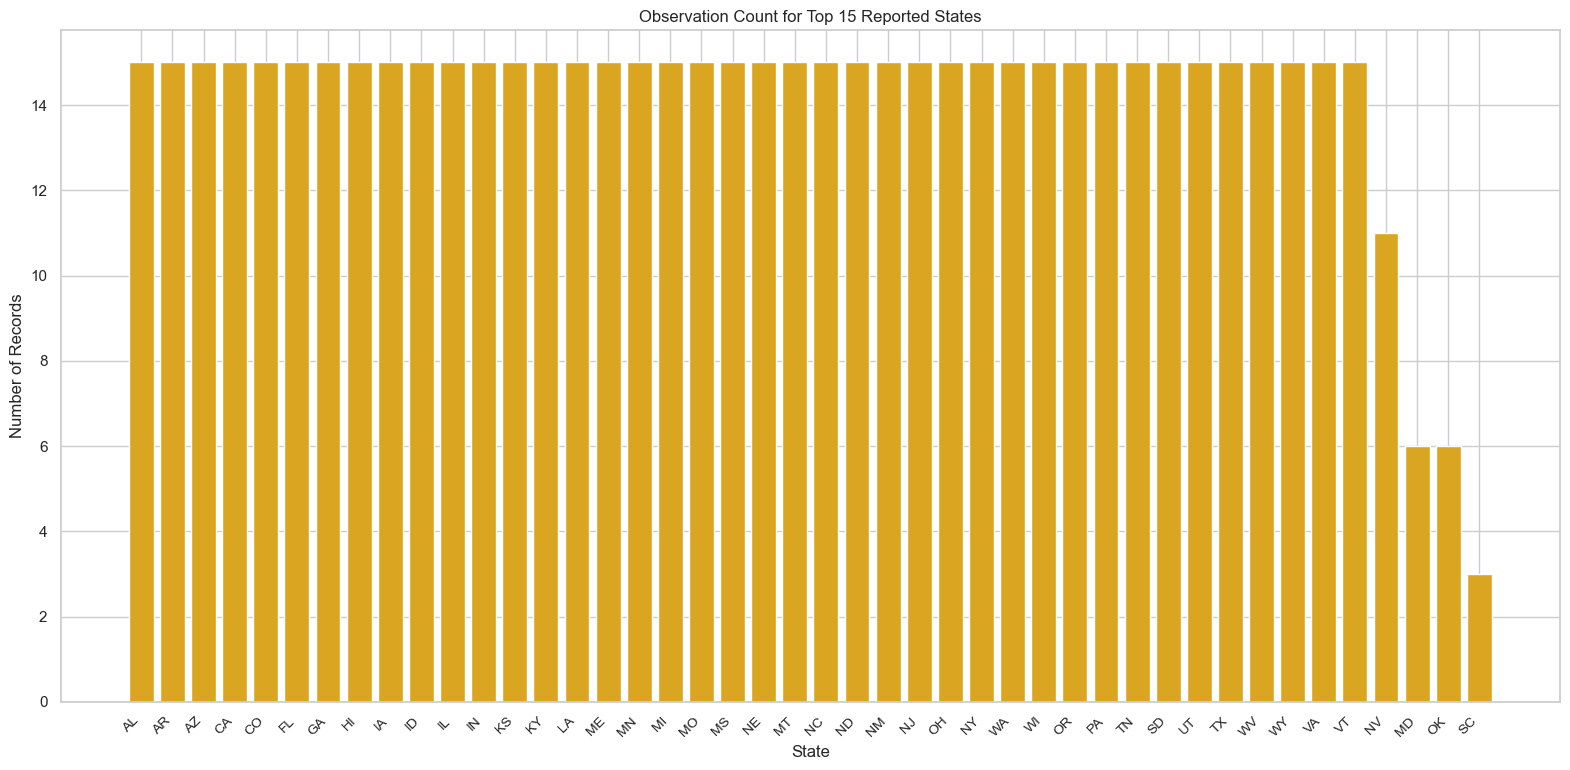

In [14]:
# The df is already filtered and structured to be the Top 15 states by count.
observation_count_by_state = df.groupby('state')['year'].count()

# Sort by count (which is already sorted in the synthetic data, but good practice)
sorted_counts = observation_count_by_state.sort_values(ascending=False)
states = sorted_counts.index
counts = sorted_counts.values

# Generate the Bar Chart
plt.figure(figsize=(16, 8))
plt.bar(states, counts, color='goldenrod')
plt.title("Observation Count for Top 15 Reported States")
plt.xlabel("State")
plt.ylabel("Number of Records")

# Use the optimized aesthetic settings
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout(pad=1.5)
plt.show()

### Insights:
1. This chart will clearly show the top 15 states that contribute the most data records to your dataset, highlighting any geographical bias in the available information.

2. It confirms which states have the most robust time-series data, which is essential before conducting deeper analysis on production trends for specific regions.

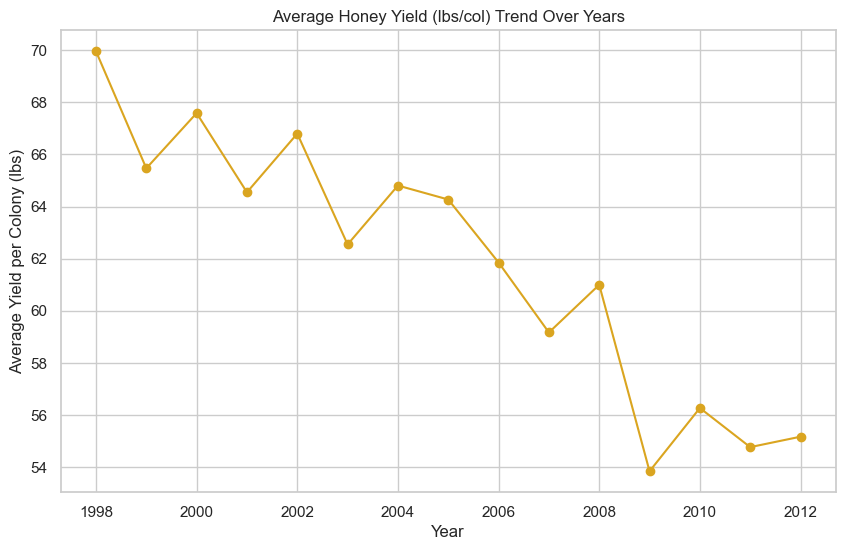

In [6]:
# Calculate the average yield per colony for each year
avg_yield_by_year = df.groupby('year')['yieldpercol'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_yield_by_year.index, avg_yield_by_year.values, marker='o', color='goldenrod')
plt.title("Average Honey Yield (lbs/col) Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Average Yield per Colony (lbs)")
plt.grid(True)
plt.show()

### Insights:
1. The plot clearly visualizes the long-term efficiency trend of honey production, allowing for the identification of periods when yield per colony was at its highest or lowest.

2. It highlights the temporal volatility in yield, which is often tied to environmental factors like weather, drought, or bee health, making it crucial for industry analysis.

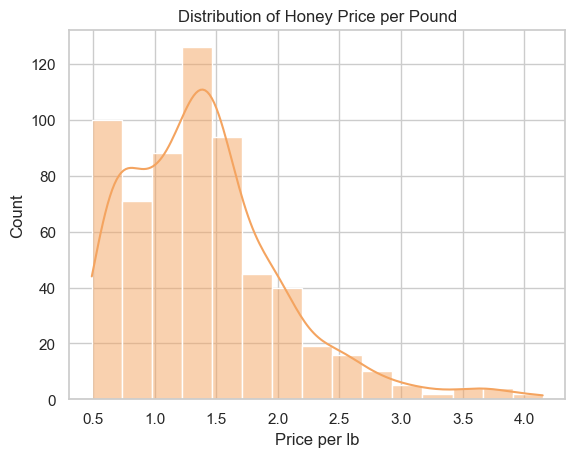

In [7]:
# Histogram of the core market feature: Price per Pound
sns.histplot(df['priceperlb'], bins=15, kde=True, color='sandybrown')
plt.title("Distribution of Honey Price per Pound")
plt.xlabel("Price per lb")
plt.show()

### Insights:
1. The histogram reveals the central tendency and skewness of the priceperlb metric, showing whether the market price is tightly clustered or highly variable.

2. It confirms the most common price range (the peak of the distribution) and identifies any outliers in price reporting.

C:\Users\PanasaKamal\AppData\Local\Temp\ipykernel_15588\243190314.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='state', y='priceperlb', data=df, palette='YlOrBr')


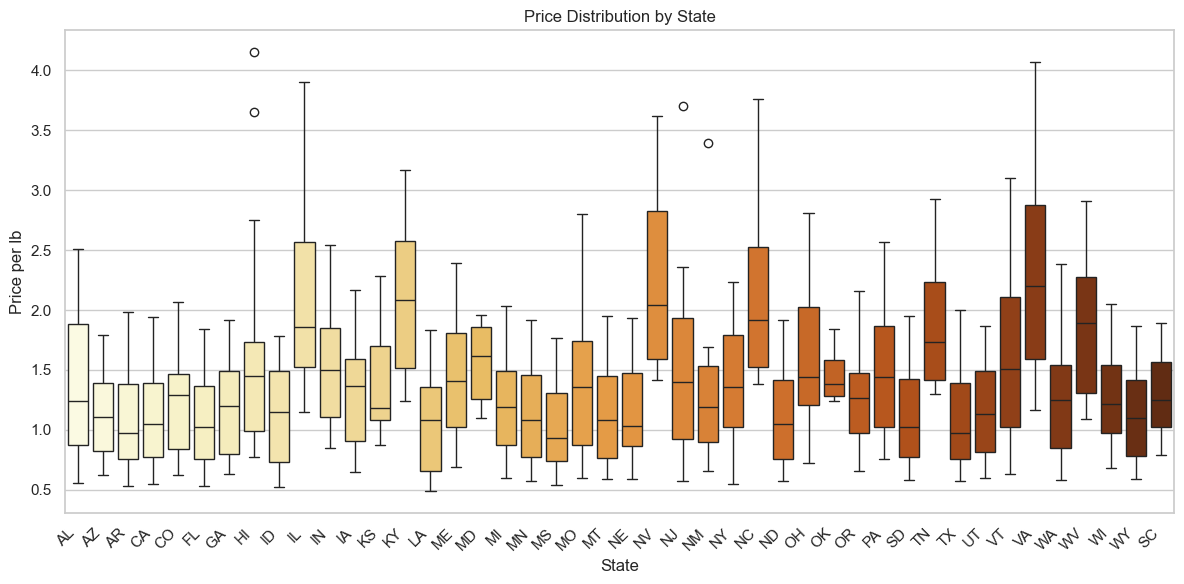

In [8]:
# Boxplot of Price per lb grouped by State
plt.figure(figsize=(12, 6))
sns.boxplot(x='state', y='priceperlb', data=df, palette='YlOrBr')
plt.title("Price Distribution by State")
plt.xlabel("State")
plt.ylabel("Price per lb")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Insights:
1. This chart compares the median, spread, and outliers of the honey price across different state markets.

2. It identifies which state is associated with the highest median price and the most consistent pricing (smallest interquartile range).

<Figure size 1200x1200 with 0 Axes>

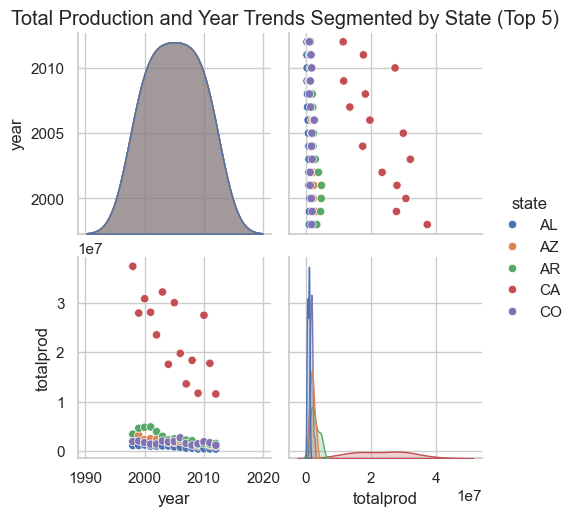

In [10]:
# To keep the plot manageable, we first filter for the top 5 states with the most data.
top_states = df['state'].value_counts().nlargest(5).index
df_top_states = df[df['state'].isin(top_states)]

plt.figure(figsize=(12, 12))
sns.pairplot(
    df_top_states,
    vars=['year', 'totalprod'],
    hue='state',
    diag_kind='kde'
)
plt.suptitle("Total Production and Year Trends Segmented by State (Top 5)", y=1.02)
plt.show()

### Insights:
1. Production Trends (Scatter Plot): The scatter plot of totalprod vs. year will show whether the production in the top states is increasing, decreasing, or stable over time, revealing state-specific trends.

2. Distribution Comparison (Diagonal KDE Plots): The diagonal plots will show the overall distribution of totalprod (where most production values cluster) and the year (confirming data coverage) for the top states.

3. State-Specific Performance: This visual will help identify if a specific state is consistently associated with the highest production values over the entire time period or if different states dominated the market in different years.

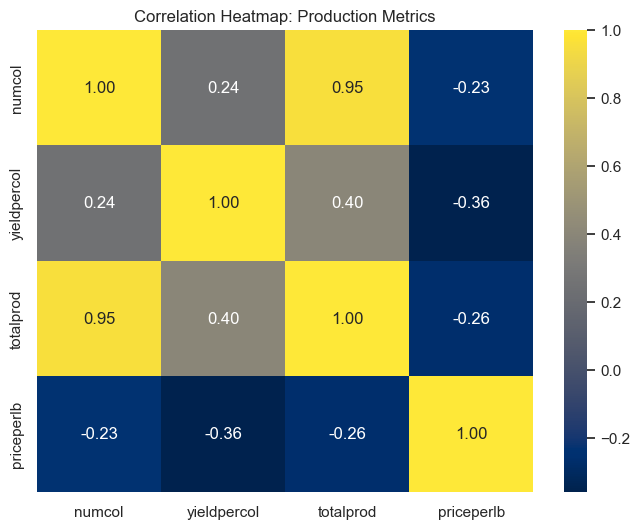

In [9]:
# Correlation Heatmap for the primary production metrics
corr = df[['numcol', 'yieldpercol', 'totalprod', 'priceperlb']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='cividis', fmt=".2f")
plt.title("Correlation Heatmap: Production Metrics")
plt.show()

### Insights:
1. The heatmap will reveal the linear relationships between features like numcol (number of colonies) and totalprod. This correlation is expected to be high, as more colonies should lead to higher total production.

2. It will also show if priceperlb is negatively correlated with totalprod (a market principle where higher supply may lead to lower prices).